# Tâche 6 : Élèments de symmétrie du réseau cristallin du NiO2
 Pour l'analyse des élèments de symmétrie du NiO2, je vais utiliser la structure "symmétrisée" de ce réseau. En effet, celle-ci fait apparaitre le plus d'élèments de symmétrie.  
 
### Les différents éléments de symmétrie ont notamment été trouvé un téléchargeant le fichier CIF "symmetrized" dans le Jmol Crystal Explorer

In [57]:
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp 
import matplotlib.pyplot as plt
import matplotlib.image as img
from jupyter_jsmol.pymatgen import quick_view
from pymatgen import Structure

with MPRester("50GdfyPDwCnkOUl2") as m:
    material_id = "mp-543096"
    # Structure for material id
    structure = m.get_structure_by_material_id(material_id)
    new_structure = analyzer.SpacegroupAnalyzer(structure).get_symmetrized_structure()
    new_structure = analyzer.SpacegroupAnalyzer(structure).get_conventional_standard_structure()
    site = new_structure.sites
    print(site)

[PeriodicSite: Ni (0.0000, 0.0000, 2.3091) [0.0000, 0.0000, 0.5000], PeriodicSite: O (1.3994, 0.8079, 3.2607) [0.3333, 0.6667, 0.7060], PeriodicSite: O (1.3994, -0.8079, 1.3576) [0.6667, 0.3333, 0.2940]]


## 1) Réflexion : le plan miroir

Tout d'abord, je vais analyser l'opération de réflexion. Cette opération est associée à un élèment de symmétrie : le plan miroir. Elle est également associée à une matrice ortogonale d'ordre 3 : 
\begin{equation}
M^T = M^{-1}
\end{equation}
agissant sur les coordonnées cartrésiennes d'un point pour en donner l'image.

Pour cet exemple, j'ai choisi le plan miroir (-y,-x,z) pour l'atome de Nickel Ni0 en position (0, 0, 0.5). La matrice associée est donc :
M = \begin{pmatrix}
    0 & -1 & 0 \\ 
    -1 & 0 & 0 \\ 
    0 & 0 & 1 
\end{pmatrix}

La postion final de l'atome de Ni est donné par la relation :

\begin{equation}
\begin{pmatrix} 0 & -1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} 0 ; \\ 0 ; \\ 0.5 \end{pmatrix} = \begin{pmatrix} 0; \\ 0; \\ 0.5 \end{pmatrix}
\end{equation}

On remarque dans ce cas que l'atome de Nickel de est renvoyé sur lui même. Le plan miroir passe donc par le Ni0. 
Les positions initiale-finale de l'atome sont calculées et illustrées via Pymatgen et jupyter-jsmol ci-dessous.

In [53]:
op_sym =SymmOp.from_xyz_string('-y,-x,z')
init_position = site[0].frac_coords
print("Position initiale Ni0 : ",init_position)
final_position = op_sym.operate(init_position)
print("Position finale Ni0 : ",final_position)

xtal = Structure.from_file("NiO2_mp-510753_symmetrized.cif")
view1 =  quick_view(xtal, supercell = [1,1,1])
display(view1)
view1.script('draw symop 8 {atomno=1}')

Position initiale Ni0 :  [0.  0.  0.5]
Position finale Ni0 :  [0.  0.  0.5]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

Si jsmol ne s'affiche pas sur GitHub, voici le résulat en photo :


<function matplotlib.pyplot.show(close=None, block=None)>

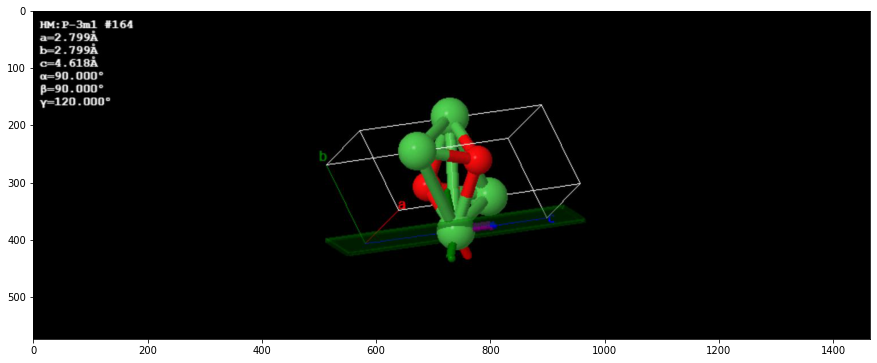

In [61]:
print("Si jsmol ne s'affiche pas sur GitHub, voici le résulat en photo :")
plt.figure(figsize = (15,15))
plt.imshow(img.imread('Data/PlanMiroir.JPG'))
plt.show 

## 2) Rotation : axe d'ordre 3 
Pour cet exemple, j'ai choisi la rotation (-y,x-y,z) pour l'atome d'oxygène 01 en position (0.3333, 0.6667, 0.7060). La matrice associée est donc :
M = \begin{pmatrix}
    0 & -1 & 0 \\ 
    1 & -1 & 0 \\ 
    0 & 0 & 1 
\end{pmatrix}

La postion final de l'atome de O est donné par la relation :

\begin{equation}
\begin{pmatrix} 0 & -1 & 0 \\ 1 & -1 & 0 \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} 0.3333; \\ 0.6667; \\ 0.7060 \end{pmatrix} = \begin{pmatrix} -0.6667; \\ -0.3333; \\ 0.7060 \end{pmatrix}
\end{equation}
Les positions initiale-finale de l'atome sont calculées et illustrées via Pymatgen et jupyter-jsmol ci-dessous.

In [52]:
op_sym =SymmOp.from_xyz_string('-y,x-y,z')
init_position = site[1].frac_coords
print("Position initiale 01 : ",init_position)
final_position = op_sym.operate(init_position)
print("Position finale 01 : ",final_position)

xtal = Structure.from_file("NiO2_mp-510753_symmetrized.cif")
view1 =  quick_view(xtal, supercell = [1,1,1])
display(view1)
view1.script('draw symop 3 {atomno=2}')

Position initiale 01 :  [0.33333333 0.66666667 0.706039  ]
Position finale 01 :  [-0.66666667 -0.33333333  0.706039  ]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

Si jsmol ne s'affiche pas sur GitHub, voici le résulat en photo :


<function matplotlib.pyplot.show(close=None, block=None)>

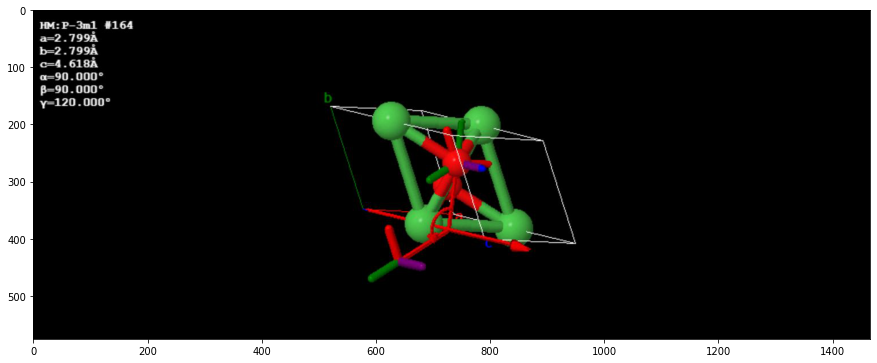

In [62]:
print("Si jsmol ne s'affiche pas sur GitHub, voici le résulat en photo :")
plt.figure(figsize = (15,15))
plt.imshow(img.imread('Data/Rotation.JPG'))
plt.show 

## 2) Roto-inversions : rotation  d'ordre 3 suivie d'une inversion de centre (0,0,0)
Pour ce dernier exemple, j'ai choisi la roto-inversion (y,-x+y,-z) et de centre (0,0,0) pour l'atome d'oxygène 02 en position (0.6667, 0.3333, 0.2940). La matrice associée est donc :
M = \begin{pmatrix}
    0 & 1 & 0 \\ 
    -1 & 1 & 0 \\ 
    0 & 0 & -1 
\end{pmatrix}

La postion final de l'atome de O est donné par la relation :

\begin{equation}
\begin{pmatrix} 0 & 1 & 0 \\ -1 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix}\begin{pmatrix} 0.6667; \\ 0.3333; \\ 0.2940 \end{pmatrix} = \begin{pmatrix} 0.3333; \\ -0.3333; \\ -0.2940 \end{pmatrix}
\end{equation}
Les positions initiale-finale de l'atome sont calculées et illustrées via Pymatgen et jupyter-jsmol ci-dessous.

In [54]:
op_sym =SymmOp.from_xyz_string('y,-x+y,-z')
init_position = site[2].frac_coords
print("Position initiale 02 : ",init_position)
final_position = op_sym.operate(init_position)
print("Position finale 02 : ",final_position)

xtal = Structure.from_file("NiO2_mp-510753_symmetrized.cif")
view1 =  quick_view(xtal, supercell = [1,1,1])
display(view1)
view1.script('draw symop 4 {atomno=4}')

Position initiale 02 :  [0.66666667 0.33333333 0.293961  ]
Position finale 02 :  [ 0.33333333 -0.33333333 -0.293961  ]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

Si jsmol ne s'affiche pas sur GitHub, voici le résulat en photo :


<function matplotlib.pyplot.show(close=None, block=None)>

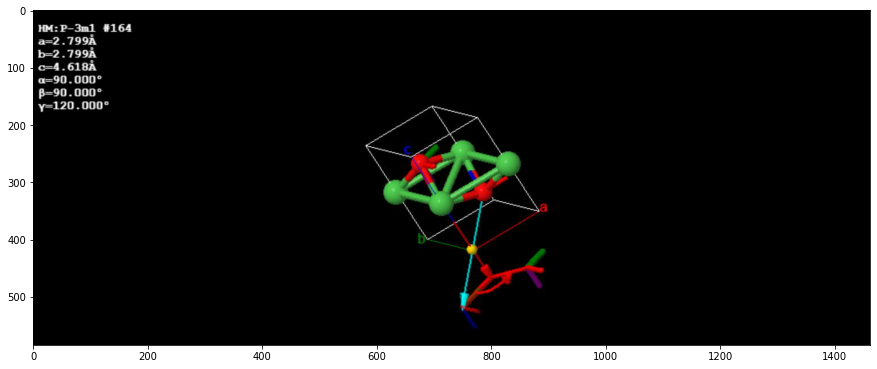

In [63]:
print("Si jsmol ne s'affiche pas sur GitHub, voici le résulat en photo :")
plt.figure(figsize = (15,15))
plt.imshow(img.imread('Data/RotoInversion.JPG'))
plt.show 